In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# Load MNIST data
with h5py.File('mnist_traindata.hdf5', 'r') as f:
    X_train = np.array(f['xdata'])
    y_train = np.array(f['ydata'])

with h5py.File('mnist_testdata.hdf5', 'r') as f:
    X_test = np.array(f['xdata'])
    y_test = np.array(f['ydata'])
# Already one-hot encoded in the dataset
y_train_one_hot = y_train  
y_test_one_hot = y_test 

# Print to check shape
print("X_train shape:", X_train.shape)
print("y_train_one_hot shape:", y_train_one_hot.shape)
print("X_test shape:", X_test.shape)
print("y_test_one_hot shape:", y_test_one_hot.shape)

X_train shape: (60000, 784)
y_train_one_hot shape: (60000, 10)
X_test shape: (10000, 784)
y_test_one_hot shape: (10000, 10)


Epoch 0: Train Loss = 1.1128769367770939, Test Loss = 1.096037799789437
Epoch 10: Train Loss = 0.45795301028185886, Test Loss = 0.4433531137863728
Epoch 20: Train Loss = 0.3948863035282104, Test Loss = 0.3854198062919834
Epoch 30: Train Loss = 0.3665531678288602, Test Loss = 0.3635070004239501
Epoch 40: Train Loss = 0.3494873903204311, Test Loss = 0.3506847184603269
Epoch 50: Train Loss = 0.3377259591461412, Test Loss = 0.3437780942771655
Epoch 60: Train Loss = 0.3289180212785051, Test Loss = 0.34046067734766855
Epoch 70: Train Loss = 0.3220683168606406, Test Loss = 0.3369606302272412
Epoch 80: Train Loss = 0.3164623589222525, Test Loss = 0.3374583950434891
Epoch 90: Train Loss = 0.31181031266456405, Test Loss = 0.336621453915887
Final Train Loss: 0.3081985021630274, Final Test Loss: 0.33614597075704067
Final Train Accuracy: 0.9144, Final Test Accuracy: 0.9058


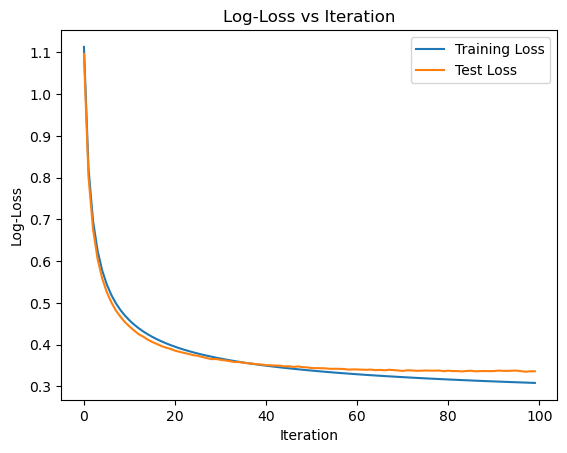

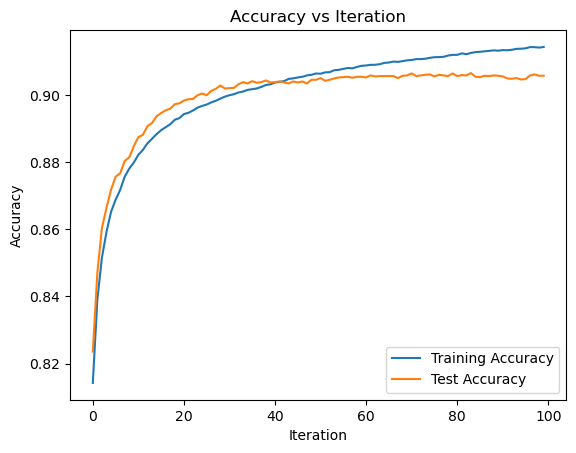

In [2]:
# Initialize weights and bias
num_classes = y_train_one_hot.shape[1]  # 10 for MNIST
num_features = X_train.shape[1]  # 784 (28x28 pixels)
weights = np.random.randn(num_classes, num_features) * 0.01  # (10, 784)
bias = np.zeros((num_classes, 1))  # Shape: (10, 1)
learning_rate = 0.005  
epochs = 100  
batch_size = 128

# Lists to store loss and accuracy
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

# Softmax function
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # For numerical stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Categorical cross-entropy loss
def categorical_cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-7  # Small value to prevent log(0)
    return -np.sum(y_true * np.log(y_pred + epsilon)) / y_true.shape[0]

# Compute gradient
def compute_gradient(X, y_true, y_pred):
    N = X.shape[0]  # Number of samples in batch
    dw = np.dot((y_pred - y_true).T, X) / N  # Weight gradient
    db = np.sum(y_pred - y_true, axis=0, keepdims=True).T / N  # Bias gradient
    return dw, db

# Training loop
for epoch in range(epochs):
    # Shuffle data
    indices = np.random.permutation(X_train.shape[0])
    X_train_shuffled = X_train[indices]
    y_train_one_hot_shuffled = y_train_one_hot[indices]
    
    # Process in mini-batches
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train_shuffled[i:i + batch_size]
        y_batch = y_train_one_hot_shuffled[i:i + batch_size]
        
        # Forward pass
        z_batch = np.dot(X_batch, weights.T) + bias.T  # Include bias in the logits
        y_pred_batch = softmax(z_batch)  # Compute softmax probabilities
        
        # Compute gradient and update weights and bias
        dw, db = compute_gradient(X_batch, y_batch, y_pred_batch)
        weights -= learning_rate * dw  # Update weights
        bias -= learning_rate * db  # Update bias

    # After each epoch, evaluate the full training set
    z_train = np.dot(X_train, weights.T) + bias.T  # Forward pass with bias
    y_pred_train = softmax(z_train)
    loss_train = categorical_cross_entropy_loss(y_train_one_hot, y_pred_train)
    train_loss.append(loss_train)
    
    predictions_train = np.argmax(y_pred_train, axis=1)
    true_labels_train = np.argmax(y_train_one_hot, axis=1)
    accuracy_train = np.mean(predictions_train == true_labels_train)
    train_accuracy.append(accuracy_train)

    #Evaluate on test set
    z_test = np.dot(X_test, weights.T)
    y_pred_test = softmax(z_test)
    loss_test = categorical_cross_entropy_loss(y_test_one_hot, y_pred_test)
    test_loss.append(loss_test)

    predictions_test = np.argmax(y_pred_test, axis=1)
    true_labels_test = np.argmax(y_test_one_hot, axis=1)  # Convert one-hot back to labels
    accuracy_test = np.mean(predictions_test == true_labels_test)
    test_accuracy.append(accuracy_test)
    
    # Print progress every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Train Loss = {loss_train}, Test Loss = {loss_test}")
# Compute final accuracy and loss
print(f"Final Train Loss: {train_loss[-1]}, Final Test Loss: {test_loss[-1]}")
print(f"Final Train Accuracy: {train_accuracy[-1]}, Final Test Accuracy: {test_accuracy[-1]}")

# Plot log-loss of the training set and test set on the same figure.
plt.plot(train_loss, label="Training Loss")
plt.plot(test_loss, label="Test Loss")
plt.xlabel("Iteration")
plt.ylabel("Log-Loss")
plt.title("Log-Loss vs Iteration")
plt.legend()
plt.show()

plt.plot(train_accuracy, label="Training Accuracy")
plt.plot(test_accuracy, label="Test Accuracy")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Iteration")
plt.legend()
plt.show()


In [3]:
# Save the model parameters
with h5py.File('mnist_network_BGD.hdf5', 'w') as hf:
    hf.create_dataset('w', data=np.asarray(weights))
    hf.create_dataset('b', data=np.asarray(bias))
print("Shape of weights (w):", weights.shape)
print("Shape of bias (b):", bias.shape)

Shape of weights (w): (10, 784)
Shape of bias (b): (10, 1)


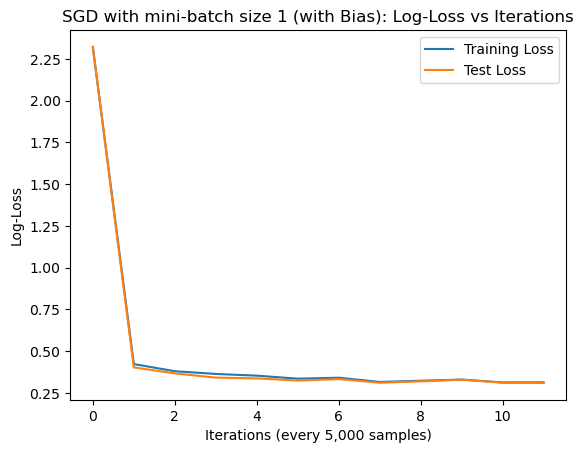

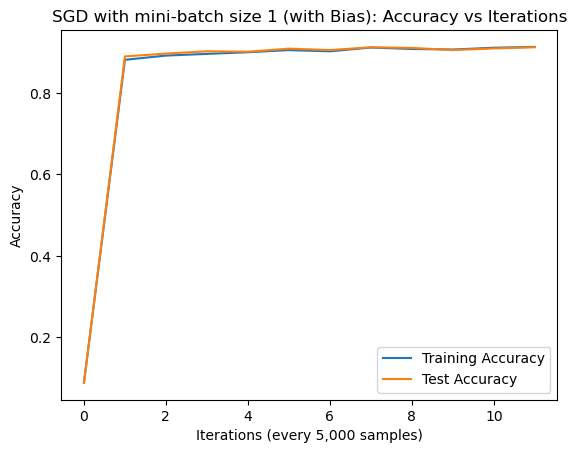

In [4]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST data (same as before)
with h5py.File('mnist_traindata.hdf5', 'r') as f:
    X_train = np.array(f['xdata'])
    y_train = np.array(f['ydata'])

with h5py.File('mnist_testdata.hdf5', 'r') as f:
    X_test = np.array(f['xdata'])
    y_test = np.array(f['ydata'])

y_train_one_hot = y_train  
y_test_one_hot = y_test 

# Initialize weights and bias
num_classes = y_train_one_hot.shape[1]  # 10 for MNIST
num_features = X_train.shape[1]  # 784 (28x28 pixels)
weights = np.random.randn(num_classes, num_features) * 0.01  # (10, 784)
bias = np.zeros((num_classes, 1))  # Bias term initialized as zeros

learning_rate = 0.01
epochs = 1  # For SGD, we only pass through the data one time

# Lists to store loss and accuracy
train_loss_sgd = []
test_loss_sgd = []
train_accuracy_sgd = []
test_accuracy_sgd = []

# Softmax function
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # For numerical stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Categorical cross-entropy loss
def categorical_cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-7
    return -np.sum(y_true * np.log(y_pred + epsilon)) / y_true.shape[0]

# Compute gradient
def compute_gradient(X, y_true, y_pred):
    N = X.shape[0]  # Number of samples in batch
    dw = np.dot((y_pred - y_true).T, X)  # Gradient for weights
    db = np.sum(y_pred - y_true, axis=0, keepdims=True).T  # Gradient for bias
    return dw, db

# SGD with mini-batch size = 1 (process one sample at a time)
for epoch in range(epochs):
    for i in range(X_train.shape[0]):
        X_sample = X_train[i:i + 1]  # One sample at a time
        y_sample = y_train_one_hot[i:i + 1]  # Corresponding label

        # Forward pass: include bias
        z_sample = np.dot(X_sample, weights.T) + bias.T  # Include bias in the logits
        y_pred_sample = softmax(z_sample)

        # Compute gradient and update weights and bias
        dw, db = compute_gradient(X_sample, y_sample, y_pred_sample)
        weights -= learning_rate * dw
        bias -= learning_rate * db

        # Record the log-loss and accuracy every 5,000 samples
        if i % 5000 == 0:
            # Training log-loss and accuracy
            z_train = np.dot(X_train, weights.T) + bias.T
            y_pred_train = softmax(z_train)
            loss_train = categorical_cross_entropy_loss(y_train_one_hot, y_pred_train)
            train_loss_sgd.append(loss_train)
            predictions_train = np.argmax(y_pred_train, axis=1)
            true_labels_train = np.argmax(y_train_one_hot, axis=1)
            accuracy_train = np.mean(predictions_train == true_labels_train)
            train_accuracy_sgd.append(accuracy_train)

            # Test log-loss and accuracy
            z_test = np.dot(X_test, weights.T) + bias.T
            y_pred_test = softmax(z_test)
            loss_test = categorical_cross_entropy_loss(y_test_one_hot, y_pred_test)
            test_loss_sgd.append(loss_test)
            predictions_test = np.argmax(y_pred_test, axis=1)
            true_labels_test = np.argmax(y_test_one_hot, axis=1)
            accuracy_test = np.mean(predictions_test == true_labels_test)
            test_accuracy_sgd.append(accuracy_test)

# Plot log-loss and accuracy for every 5,000 samples
plt.plot(train_loss_sgd, label='Training Loss')
plt.plot(test_loss_sgd, label='Test Loss')
plt.xlabel('Iterations (every 5,000 samples)')
plt.ylabel('Log-Loss')
plt.legend()
plt.title("SGD with mini-batch size 1 (with Bias): Log-Loss vs Iterations")
plt.show()

plt.plot(train_accuracy_sgd, label='Training Accuracy')
plt.plot(test_accuracy_sgd, label='Test Accuracy')
plt.xlabel('Iterations (every 5,000 samples)')
plt.ylabel('Accuracy')
plt.legend()
plt.title("SGD with mini-batch size 1 (with Bias): Accuracy vs Iterations")
plt.show()


In [5]:
# Save the model parameters
with h5py.File('mnist_network_mini-1.hdf5', 'w') as hf:
    hf.create_dataset('w', data=np.asarray(weights))
    hf.create_dataset('b', data=np.asarray(bias))
print("Shape of weights (w):", weights.shape)
print("Shape of bias (b):", bias.shape)

Shape of weights (w): (10, 784)
Shape of bias (b): (10, 1)


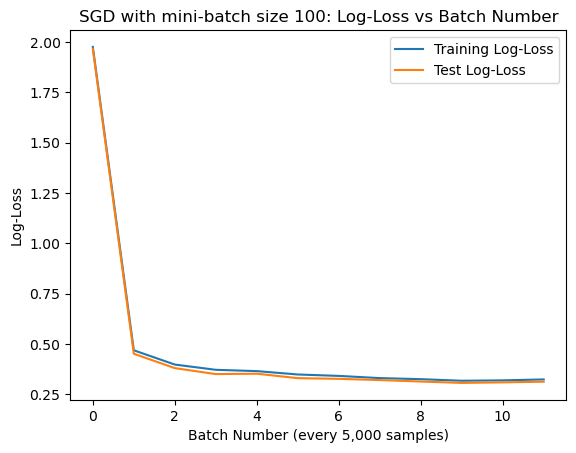

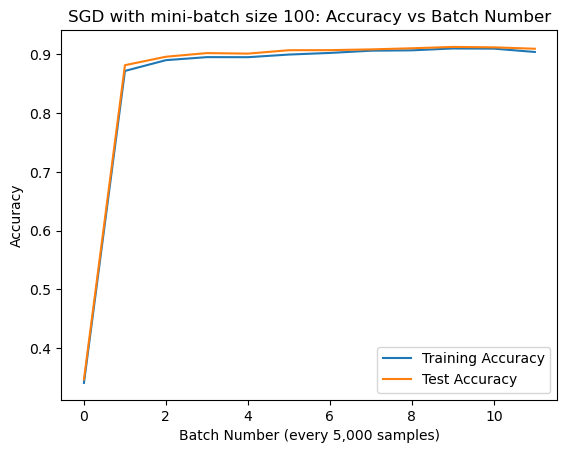

In [6]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST data (same as before)
with h5py.File('mnist_traindata.hdf5', 'r') as f:
    X_train = np.array(f['xdata'])
    y_train = np.array(f['ydata'])

with h5py.File('mnist_testdata.hdf5', 'r') as f:
    X_test = np.array(f['xdata'])
    y_test = np.array(f['ydata'])

y_train_one_hot = y_train  
y_test_one_hot = y_test 

# Initialize weights and bias
num_classes = y_train_one_hot.shape[1]  # 10 for MNIST
num_features = X_train.shape[1]  # 784 (28x28 pixels)
weights = np.random.randn(num_classes, num_features) * 0.01  # (10, 784)
bias = np.zeros((num_classes, 1))  # Bias term initialized as zeros

learning_rate = 0.5  # Use a higher learning rate to improve convergence
epochs = 1  # Pass through the dataset once
batch_size = 100  # Mini-batch size of 100

# Lists to store loss and accuracy
train_loss_sgd = []
test_loss_sgd = []
train_accuracy_sgd = []
test_accuracy_sgd = []
batch_numbers = []  # To track the batch number for x-axis

# Softmax function
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # For numerical stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Categorical cross-entropy loss
def categorical_cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-7
    return -np.sum(y_true * np.log(y_pred + epsilon)) / y_true.shape[0]

# Compute gradient for both weights and bias
def compute_gradient(X, y_true, y_pred):
    N = X.shape[0]  # Number of samples in batch
    dw = np.dot((y_pred - y_true).T, X) / N
    db = np.sum(y_pred - y_true, axis=0, keepdims=True).T / N  # Bias gradient
    return dw, db

# SGD with mini-batch size = 100
batch_counter = 0

for epoch in range(epochs):
    # Shuffle the training data at the beginning of each epoch
    indices = np.random.permutation(X_train.shape[0])
    X_train_shuffled = X_train[indices]
    y_train_one_hot_shuffled = y_train_one_hot[indices]

    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train_shuffled[i:i + batch_size]
        y_batch = y_train_one_hot_shuffled[i:i + batch_size]

        # Forward pass with bias
        z_batch = np.dot(X_batch, weights.T) + bias.T
        y_pred_batch = softmax(z_batch)

        # Compute gradient and update weights and bias
        dw, db = compute_gradient(X_batch, y_batch, y_pred_batch)
        weights -= learning_rate * dw
        bias -= learning_rate * db

        # Log performance every 5,000 samples
        if batch_counter % 50 == 0:  # 50 mini-batches of size 100 equals 5,000 samples
            # Training log-loss and accuracy
            z_train = np.dot(X_train, weights.T) + bias.T
            y_pred_train = softmax(z_train)
            loss_train = categorical_cross_entropy_loss(y_train_one_hot, y_pred_train)
            train_loss_sgd.append(loss_train)
            predictions_train = np.argmax(y_pred_train, axis=1)
            true_labels_train = np.argmax(y_train_one_hot, axis=1)
            accuracy_train = np.mean(predictions_train == true_labels_train)
            train_accuracy_sgd.append(accuracy_train)

            # Test log-loss and accuracy
            z_test = np.dot(X_test, weights.T) + bias.T
            y_pred_test = softmax(z_test)
            loss_test = categorical_cross_entropy_loss(y_test_one_hot, y_pred_test)
            test_loss_sgd.append(loss_test)
            predictions_test = np.argmax(y_pred_test, axis=1)
            true_labels_test = np.argmax(y_test_one_hot, axis=1)
            accuracy_test = np.mean(predictions_test == true_labels_test)
            test_accuracy_sgd.append(accuracy_test)

            # Append batch number for plotting
            batch_numbers.append(batch_counter // 50)

        batch_counter += 1

# Plot log-loss vs batch number
plt.plot(batch_numbers, train_loss_sgd, label='Training Log-Loss')
plt.plot(batch_numbers, test_loss_sgd, label='Test Log-Loss')
plt.xlabel('Batch Number (every 5,000 samples)')
plt.ylabel('Log-Loss')
plt.legend()
plt.title('SGD with mini-batch size 100: Log-Loss vs Batch Number')
plt.show()

# Plot accuracy vs batch number
plt.plot(batch_numbers, train_accuracy_sgd, label='Training Accuracy')
plt.plot(batch_numbers, test_accuracy_sgd, label='Test Accuracy')
plt.xlabel('Batch Number (every 5,000 samples)')
plt.ylabel('Accuracy')
plt.legend()
plt.title('SGD with mini-batch size 100: Accuracy vs Batch Number')
plt.show()


In [7]:
# Save the model parameters
with h5py.File('mnist_network_mini-100.hdf5', 'w') as hf:
    hf.create_dataset('w', data=np.asarray(weights))
    hf.create_dataset('b', data=np.asarray(bias))
print("Shape of weights (w):", weights.shape)
print("Shape of bias (b):", bias.shape)

Shape of weights (w): (10, 784)
Shape of bias (b): (10, 1)
